In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# 1. K_means 구현

In [2]:
def kmeans(k, points):
    prev_assignments = []
    
    #1. 랜덤으로 중심점(centroid) 선택
    centroids = random.choices(points, k = 3)
    
    for epoch in range(10):
        #2. 각 점마다 가장 가까운 centroid의 cluster에 점 할당
        assignments = [assign(p, centroids) for p in points]
        
        #3. cluster의 평균을 구해서 centroid 업데이트
        centroids = compute_centroids(assignments, points, k)
        
        #4. cluster가 변했는지 확인하고, 변해으면 계속, 변하기 않았으면 멈춤
        if prev_assignments == assignments:
            break
        prev_assignments = assignments
        
        
    return assignments, centroids

In [3]:
def assign(points, centroids):
    min_dist_centroid_idx = -1
    min_dist = 9 ** 9
    
    for i, c in enumerate(centroids):
        dist = np.sum((c-points) ** 2)
        if min_dist > dist:
            min_dist_centroid_idx = i
            min_dist = dist
    return min_dist_centroid_idx

In [4]:
def compute_centroids(assignments, points, k):
    clusters = [[] for _ in range(k)]
    
    for a, p in zip(assignments, points):
        clusters[a].append(p)
        
    return [np.mean(c, axis = 0) for c in clusters]

In [5]:
# 데이터 생성
k = 3
points = [np.random.randn(k) for _ in range(80)]
points.extend([np.random.randn(k) + np.array([5, 5, 5]) for _ in range(1000)])
points.extend([np.random.randn(k) + np.array([10, 5, 0]) for _ in range(1000)])
points = np.array(points)

/Users/seongyoon/programming/program/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


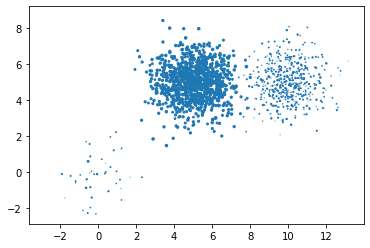

In [6]:
plt.scatter(*zip(*points))
plt.show()

In [7]:
#k_means 실행
assignments, centroids = kmeans(k, points)

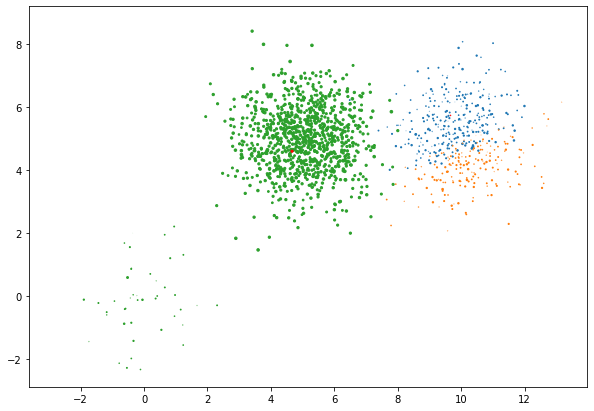

In [8]:
# 결과 확인
plt.figure(figsize = (10,7))
a,c = kmeans(3, points)
clusters = [[] for _ in range(3)]

for aa, p in zip(a, points):
    clusters[aa].append(p)
    
for clst in clusters:
    plt.scatter(*zip(*clst))

plt.scatter(*zip(*c), c = 'red')
plt.show()

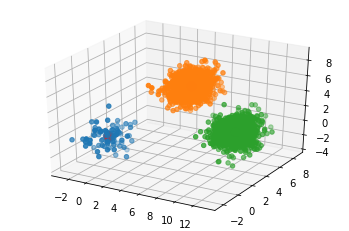

In [9]:
# 결과 확인2
fig = plt.figure()
ax = fig.gca(projection = '3d')

clusters = [[] for _ in range(k)]
for a, p in zip(assignments, points):
    clusters[a].append(p)
    
for cluster in clusters:
    ax.scatter(*zip(*cluster))

ax.scatter(*zip(*centroids), s = 100)
plt.show()

# 2. 이미지 처리 응용_이미지 압축

In [10]:
from PIL import Image

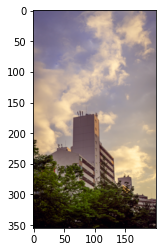

In [11]:
#사진 불러오기 & 크기 조절 & 화면에 출력
im = Image.open("home.jpg")

width = 200
height = im.height * width // im.width
im = im.resize((width, height))

plt.imshow(im)
plt.show()

/Users/seongyoon/programming/program/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/seongyoon/programming/program/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


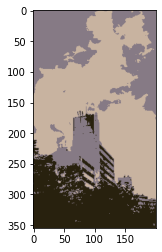

In [12]:
# 데이터 준비 & k_means 알고리즘 적용
pixels = np.array(im).reshape(-1,3)
assignments, centroids = kmeans(10, pixels)

# 모든 픽셀의 색을 centroid중 하나로 선택
for a, i in zip(assignments, range(pixels.shape[0])):
    pixels[i] = centroids[a]
    
# 바뀐 그림 출력
im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3), 'RGB')
plt.imshow(im_remastered)
plt.show()